<a href="https://colab.research.google.com/github/yeelvis/Online-Food-Data-Analysis/blob/main/Online_Food_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Analysis of Online Food Order

Dataset: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset?resource=download

In [137]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium

In [138]:
# Read the data into a panda dataframe
food_data = pd.read_csv('https://raw.githubusercontent.com/yeelvis/Online-Food-Data-Analysis/main/onlinefoods.csv')

In [139]:
# basic information about the data frame
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [140]:
# Remove auxilary columns
food_data.drop(columns=['Unnamed: 12'], inplace = True)

In [141]:
# basic information after dropping the unnecessary columns
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


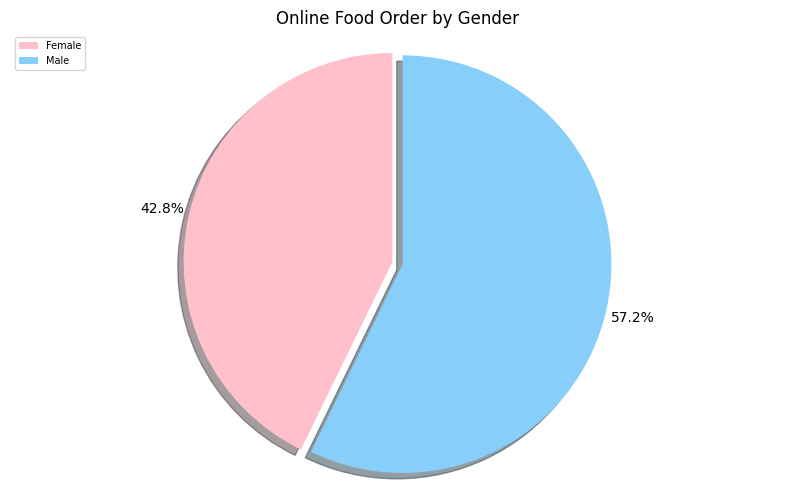

In [142]:
# The gender composition of the data set who order food online

# filter the data set to get the count by gender
df_gender = food_data.groupby('Gender').size()

df_gender.plot( kind='pie',
                figsize=(10, 6),
                autopct='%1.1f%%',
                startangle=90,
                shadow=True,
                labels=None,         # turn off labels on pie chart
                pctdistance=1.13,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                colors=['pink', 'lightskyblue'],  # add custom colors
                explode=[0,0.05] # 'explode' lowest 3 continents
                )

# Add title
plt.title('Online Food Order by Gender')
plt.axis('equal')

# add legend
plt.legend(labels=df_gender.index, loc='upper left', fontsize=7)

plt.show()

In [143]:
def generate_plotly_pie_chart(data, title):
  fig = go.Figure()
  fig.add_trace(go.Pie(labels=data.index, values=data))

  # Set layout options
  fig.update_layout(
      title={'text': title})

  # Display the plot
  fig.show()

In [144]:
'Marital Status compositions of online food orders'
df_marital_status = food_data.groupby('Marital Status').size()

generate_plotly_pie_chart(df_marital_status,'Online Food Order by Marital Status')

In [145]:
'Online food orders by occupations'

df_occupation = food_data.groupby('Occupation').size()
generate_plotly_pie_chart(df_occupation,'Online Food Order by Occupations')

In [168]:
# Display where the data was collected from

from folium import plugins

# Center map to Bengaluru
map = folium.Map(location=[12.972442, 77.580643], zoom_start=12, tiles='Cartodb positron')

markers = plugins.MarkerCluster().add_to(map)

for lat, lng in zip(food_data['latitude'], food_data['longitude']):
  folium.Marker(
      location=[lat, lng],
      icon=None,
  ).add_to(markers)

map